## VGG16

### VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION
https://arxiv.org/pdf/1409.1556.pdf

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPool2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.utils import plot_model

<img src="images/VGG16.png" style="width=45px;height=45"/>

In [2]:
def vgg16(input_shape=(224,224,3), n_classes=1000, pooling=None, include_top=True, weights=None):
    input = Input(input_shape)
    
#   Block 1: 
#     2 x convolution layer of 64 channel of 3x3 kernal and same padding
#     1 x maxpool layer of 2x2 pool size and stride 2x2
    x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(input)
    x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPool2D(pool_size=2, strides=2)(x)

#   Block 2: 
#     2 x convolution layer of 128 channel of 3x3 kernal and same padding
#     1 x maxpool layer of 2x2 pool size and stride 2x2
    x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPool2D(pool_size=2, strides=2)(x)

#   Block 3
#     3 x convolution layer of 256 channel of 3x3 kernal and same padding
#     1 x maxpool layer of 2x2 pool size and stride 2x2
    x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPool2D(pool_size=2, strides=2)(x)

#   Block 4
#     3 x convolution layer of 512 channel of 3x3 kernal and same padding
#     1 x maxpool layer of 2x2 pool size and stride 2x2
    x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPool2D(pool_size=2, strides=2)(x)

#   Block 5
#     3 x convolution layer of 512 channel of 3x3 kernal and same padding
#     1 x maxpool layer of 2x2 pool size and stride 2x2
    x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPool2D(pool_size=2, strides=2)(x)

    if include_top:
        # Classification block
        x = Flatten()(x)
        # 1 x Dense layer of 4096 units
        x = Dense(units=4096, activation='relu')(x)
        # 1 x Dense layer of 4096 units
        x = Dense(units=4096, activation='relu')(x)
        # 1 x Dense Softmax layer
        x = Dense(n_classes, activation='softmax')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)    
    
    model = Model(input, x)
    
    if weights is not None:
        model.load_weights(weights)
     
    return model

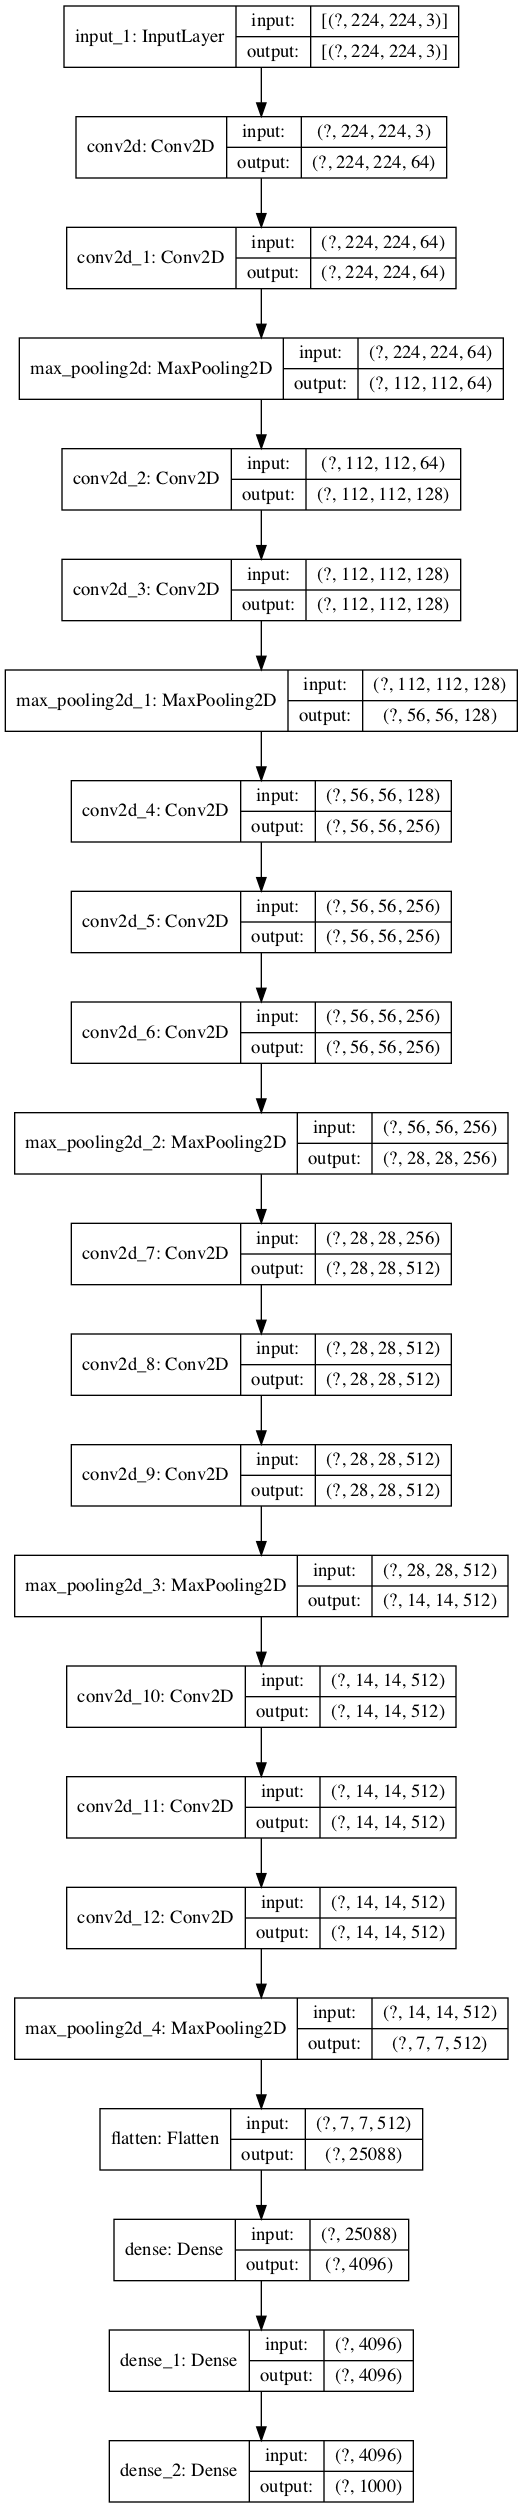

In [3]:
model = vgg16()
plot_model(model, to_file='VGG16Model.png', show_shapes=True)

In [4]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)      